In [18]:
import numpy as np
import mylibrary.nnlib as tnn
import mylibrary.splinelib as tsp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import copy
matplotlib.rcParams['figure.figsize'] = (12, 8)

#### Dataset 0

In [2]:
num_points = 50
X1 = np.linspace(-2.5, 1.5, num_points)
X2 = np.linspace(-2, 4, num_points)
X1, X2 = np.meshgrid(X1, X2)
Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1.

####Scaling the data to range -1,1
X1 = 2*(X1 - X1.min())/(X1.max() - X1.min()) -1
X2 = 2*(X2 - X2.min())/(X2.max() - X2.min()) -1
Y = 2*(Y - Y.min())/(Y.max() - Y.min()) -1

x1 = X1.reshape(-1)
x2 = X2.reshape(-1)

%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.scatter(X1, X2, Y)
ax.plot_surface(X1, X2, Y, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

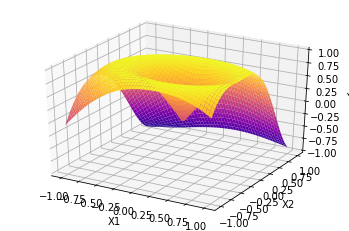

In [3]:
%matplotlib inline

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1, X2, Y, cmap='plasma')
# ax.scatter(X1, X2, Y)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

#### Dataset 1

In [49]:
# The two-dimensional domain of the fit.....
########https://scipython.com/blog/non-linear-least-squares-fitting-of-a-two-dimensional-data/#########
x1min, x1max, nx1 = -5, 4, 75
x2min, x2max, nx2 = -3, 7, 75
x1, x2 = np.linspace(x1min, x1max, nx1), np.linspace(x2min, x2max, nx2)
X1, X2 = np.meshgrid(x1, x2)

# Our function to fit is going to be a sum of two-dimensional Gaussians
def gaussian(x1, x2, x10, x20, x1alpha, x2alpha, A):
    return A * np.exp( -((x1-x10)/x1alpha)**2 -((x2-x20)/x2alpha)**2)

# A list of the Gaussian parameters: x10, x20, x1alpha, x2alpha, A
gprms = [(0, 2, 2.5, 5.4, 1.5),
         (-1, 4, 6, 2.5, 1.8),
         (-3, -0.5, 1, 2, 4),
         (3, 0.5, 2, 1, 5)
        ]

# Standard deviation of normally-distributed noise to add in generating
# our test function to fit.
# The function to be fit is Z.
Y = np.zeros(X1.shape)
for p in gprms:
    Y += gaussian(X1, X2, *p)
### Adding noise to the data
# noise_sigma = 0.1
# Z += noise_sigma * np.random.randn(*Z.shape)

####Scaling the data to range -1,1
X1 = 2*(X1 - X1.min())/(X1.max() - X1.min()) -1
X2 = 2*(X2 - X2.min())/(X2.max() - X2.min()) -1
Y = 2*(Y - Y.min())/(Y.max() - Y.min()) -1

## reusing the variable name
x1 = X1.reshape(-1)
x2 = X2.reshape(-1)

# Plot the 3D figure of the fitted function and the residuals.
%matplotlib tk

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1, X2, Y, cmap='plasma')
# ax.set_zlim(0,np.max(Y)+2)
plt.show()

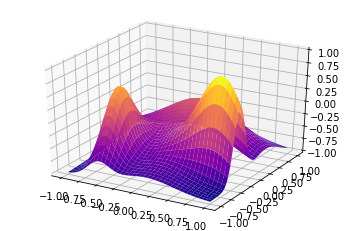

In [5]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1, X2, Y, cmap='plasma')
# ax.set_zlim(0,np.max(Z)+2)
plt.show()

In [45]:
# netList = []
xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

In [46]:
optimizer=tnn.Adam()

### Using Neural Network

In [47]:
n_hidden = 10
net = tnn.AutoForm(new_layers=True)
layer1 = tnn.NonLinearLayer(2, n_hidden, activation=tnn.Gaussian(), optimizer=optimizer)
layer2 = tnn.LinearLayer(n_hidden, 1, optimizer=optimizer)

In [48]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
    yout = net.forward(xx)
    dy = yout - yy
    dx = net.backward(dy)
    
    net.update()
    
    if epoch%1000 == 0:
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.6521785678107925


1000 Error =  0.01932260088649219


2000 Error =  0.008813634580275771


3000 Error =  0.008498098933251746


4000 Error =  0.005362677258744388


5000 Error =  0.005228852227437148


6000 Error =  0.004972994666106941


7000 Error =  0.004842129504690266


8000 Error =  0.004789307725225927


9000 Error =  0.0047546134394343045


10000 Error =  0.004733401202423757


11000 Error =  0.004715517686658296


12000 Error =  0.004702526700591019


13000 Error =  0.004692572958916778


14000 Error =  0.004690372885042887


15000 Error =  0.004777027295001522


16000 Error =  0.0046729415368708584


17000 Error =  0.004673220506910169


18000 Error =  0.004664132995647049


TclError: invalid command name "pyimage150"

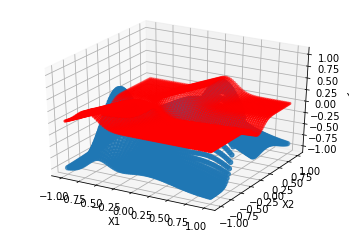

In [41]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [42]:
# yy = -dy
# netList.append(copy.deepcopy(net))